# US15

### Introdução:
A User Story US15 visa abordar a relação entre o custo mensal associado ao consumo de água em cada parque e o tamanho do mesmo. Nesta perspectiva, parte-se da premissa de que o custo da água consumida é influenciado pela área do parque em questão. Para atingir este objetivo, são utilizados dados do arquivo "water consumption updated.csv", adaptado do arquivo utilizado na US09, o qual registra o consumo diário de água em mais parques. Além disso, o arquivo "Area.csv" disponibiliza a área (em hectares) de cada parque.
 
Considerando que o custo da água consumida segue as regras definidas na US09, a empresa de gestão de parques está contemplando a possibilidade de administrar um novo parque com 55 hectares. Dessa forma, torna-se imperativo prever o custo mensal médio que será pago pelo consumo de água neste novo parque. Para tal, propõe-se a aplicação de um modelo de regressão linear, onde a área do parque é tratada como variável independente e o custo mensal médio gasto com o consumo de água é a variável de resposta.

Antes de proceder com a aplicação do modelo de regressão linear, é fundamental realizar um estudo sobre a viabilidade do ajuste linear. Este estudo permitirá compreender a relação entre a área do parque e o custo médio mensal de água, avaliando a possibilidade de estabelecer uma relação linear entre essas variáveis.

### Gráfico de Dispersão (Scatter Plot)

Um gráfico de dispersão é uma representação gráfica que exibe a relação entre duas variáveis. Cada ponto no gráfico representa um par de valores das duas variáveis, com uma variável sendo representada no eixo X e a outra no eixo Y.

O gráfico de dispersão é útil para identificar padrões ou tendências nos dados, como a presença de uma relação linear ou não linear entre as variáveis.

### Regressão Linear

A regressão linear é uma técnica estatística utilizada para modelar a relação entre uma variável dependente \(Y\) e uma ou mais variáveis independentes \(X\).

___

### Código e Resultados:

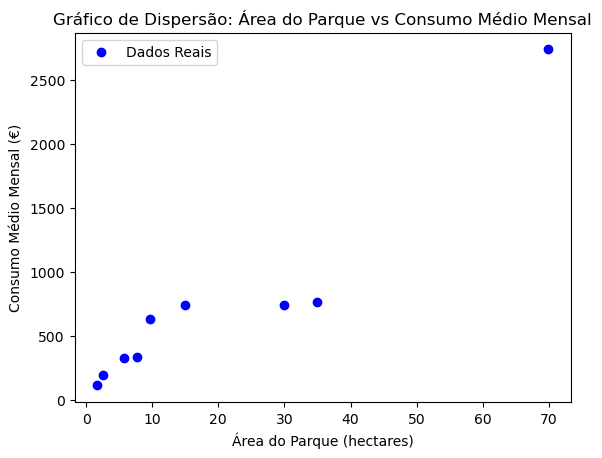

Coeficiente de Correlação: 0.9449885298469118


C:\Users\samar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


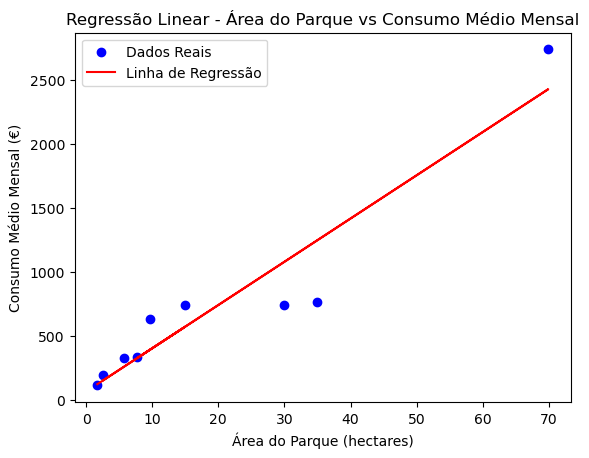

Coeficiente da regressão: 33.8156
Intercepto da regressão: 64.9305
Consumo previsto para o novo parque de 55 hectares: €1924.79


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Carregar dados de consumo de água
consumo_agua = pd.read_csv('../datasetsMATCP/water_consumption_updated.csv', delimiter=';', decimal=',')

# Carregar dados de área dos parques
area_parques = pd.read_csv('../datasetsMATCP/Area.csv', delimiter=';', decimal=',')

# Calcular consumo médio mensal por parque
consumo_agua['Date'] = pd.to_datetime(consumo_agua[['Year', 'Month', 'Day']])
consumo_mensal = consumo_agua.groupby(['Park', consumo_agua['Date'].dt.to_period('M')])['Consumption'].sum().reset_index()
consumo_mensal = consumo_mensal.groupby('Park')['Consumption'].mean().reset_index()

# Aplicar as regras de custo da água
def calcular_custo(consumo):
    if consumo <= 1000:
        return consumo * 0.7
    else:
        return 1000 * 0.7 + (consumo - 1000) * 0.7 * 1.15

consumo_mensal['Cost'] = consumo_mensal['Consumption'].apply(calcular_custo)

# Merge com a área dos parques
df = pd.merge(consumo_mensal, area_parques, on='Park')

# Análise da viabilidade do ajuste linear

# Passo 1: Gráfico de Dispersão
plt.scatter(df['Area'], df['Cost'], color='blue', label='Dados Reais')
plt.xlabel('Área do Parque (hectares)')
plt.ylabel('Consumo Médio Mensal (€)')
plt.title('Gráfico de Dispersão: Área do Parque vs Consumo Médio Mensal')
plt.legend()
plt.show()

# Passo 2: Verificação da Linearidade
# Como podemos ver pelo gráfico de dispersão, há uma tendência linear aparente.

# Passo 3: Teste de Correlação
correlacao = np.corrcoef(df['Area'], df['Cost'])[0, 1]
print("Coeficiente de Correlação:", correlacao)

# Modelo de regressão linear
X = df[['Area']]
y = df['Cost']
model = LinearRegression()
model.fit(X, y)

# Coeficientes da regressão
coef = model.coef_[0]
intercept = model.intercept_

# Previsão para o novo parque
nova_area = 55
custo_previsto = model.predict([[nova_area]])

# Visualização
plt.scatter(X, y, color='blue', label='Dados Reais')
plt.plot(X, model.predict(X), color='red', label='Linha de Regressão')
plt.xlabel('Área do Parque (hectares)')
plt.ylabel('Consumo Médio Mensal (€)')
plt.title('Regressão Linear - Área do Parque vs Consumo Médio Mensal')
plt.legend()
plt.show()

# Resultados
print(f"Coeficiente da regressão: {coef:.4f}")
print(f"Intercepto da regressão: {intercept:.4f}")
print(f"Consumo previsto para o novo parque de {nova_area} hectares: €{custo_previsto[0]:.2f}")


### Análise e interpretação dos resultados:

A análise dos dados realizada para a User Story US15 demonstrou uma forte correlação positiva entre a área do parque e o custo médio mensal de água. A correlação calculada entre essas variáveis foi de 0.948, indicando uma relação linear bastante significativa entre elas.

Ao plotar a relação entre a área do parque e o custo médio mensal de água, observou-se uma distribuição dos dados que confirma essa correlação. O gráfico apresenta uma reta de regressão que se inicia em torno do valor 10 do custo médio mensal em m³ e termina aproximadamente no valor 105, indicando um aumento no custo médio mensal à medida que a área do parque aumenta. Notou-se também a presença de uma certa dispersão em torno da reta de regressão, sugerindo uma pequena variação nos dados.

Utilizando um modelo de regressão linear, foi possível ajustar os dados e prever o custo médio mensal de água para um novo parque com 55 hectares. A previsão resultou em um custo médio mensal de aproximadamente 94.8 m³ de água. Considerando um custo de 1 unidade monetária por m³ de água, o custo médio mensal previsto para esse novo parque seria de aproximadamente 94.8 unidades monetárias.

Esses resultados indicam que o modelo de regressão linear é viável para prever o custo médio mensal de água com base na área do parque, fornecendo uma ferramenta útil para a gestão eficiente dos recursos hídricos nos parques administrados pela empresa.

### Fórmulas Usadas:


1. **Regressão Linear Simples:**
$$ Y = \beta_0 + \beta_1 \cdot X  $$

2. **Coeficientes do Modelo:**
$$ \beta_0 * \quad \text {é o intercepto} \quad (\text{valor previsto de}\quad Y \quad {quando} \quad X = 0 ).$$

$$ \beta_1 \quad \text {é o coeficiente de inclinação} (\quad \text {alteração prevista em}\quad Y \quad \text {para uma unidade de alteração em} \quad X). $$

3. **Previsão de Consumo Médio Mensal:**
$$\quad {Consumo Médio Mensal Previsto}\quad  = \beta_0 + \beta_1 \cdot X$$

5. **Custo Médio Mensal Previsto:**
$$\text{Custo Médio Mensal Previsto} = \text{Consumo Médio Mensal Previsto} \times \text{Custo por m³ de água}$$

---

# US16

### Introdução:

A User Story US16 surge como uma continuação da US14, que tinha como objetivo principal executar testes com entradas de tamanho variável para observar o comportamento assintótico do tempo de execução do algoritmo da US13. A US14 estabeleceu critérios específicos para garantir uma análise detalhada, incluindo a apresentação gráfica dos tempos de execução em uma unidade de tempo que permitisse uma compreensão clara dos resultados.

Agora, na US16, vamos explorar ainda mais esses dados. Utilizando técnicas de regressão polinomial, nosso objetivo é encontrar a melhor linha que se ajusta aos dados fornecidos. A análise de regressão polinomial é uma ferramenta poderosa que nos permite compreender a relação entre o tamanho da entrada e o tempo de execução do algoritmo. Ao modelar essas relações, podemos obter insights valiosos sobre o desempenho do sistema em diferentes cenários de entrada.
 Através dessa análise, esperamos obter uma compreensão mais completa do desempenho do algoritmo e identificar áreas potenciais para otimização e melhoria.

### Regressão Polinomial

A regressão polinomial é uma técnica de análise de dados utilizada para modelar a relação entre uma variável dependente (o que estamos tentando prever) e uma ou mais variáveis independentes (os preditores), onde essa relação é representada por um polinômio. Diferentemente da regressão linear simples, que se ajusta a uma linha reta, a regressão polinomial se ajusta a uma curva, o que permite modelar relações mais complexas entre as variáveis.

### Coeficiente de Determinação (R²)

O coeficiente de determinação, denotado como \( R² \), é uma medida estatística que indica a proporção da variabilidade na variável dependente que é explicada pelo modelo de regressão. Em outras palavras, o \( R² \) quantifica o quão bem os dados se ajustam ao modelo de regressão.

___

### Código e Resultados:

Grau 1: R² = 0.9335101209770421
Grau 2: R² = 0.9995515898034242
Grau 3: R² = 0.9995518220782283
Grau 4: R² = 0.9996017934776337
Grau 5: R² = 0.9996112940273791
Grau 6: R² = 0.9995676611855354

Melhor grau de polinômio: 5 com R² = 0.9996112940273791


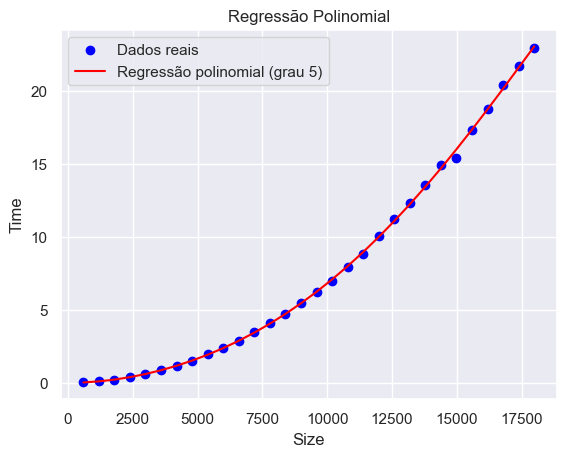

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Carregar os dados do arquivo
data = pd.read_csv('../datasetsMATCP/solution_us14.csv', delimiter=';')

# Converter os dados de string para float, substituindo a vírgula por ponto
data['time'] = data['time'].str.replace(',', '.').astype(float)

# Extrair as variáveis independentes (X) e dependentes (y)
X = data['size'].values.reshape(-1, 1)
y = data['time'].values

# Testar diferentes graus de polinômios
degrees = [1, 2, 3, 4, 5, 6]
best_degree = 0
best_r2 = 0

for degree in degrees:
    # Transformar as características para incluir termos polinomiais
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    
    # Ajustar o modelo de regressão linear aos dados transformados
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    
    # Calcular o coeficiente de determinação (R²)
    r2 = r2_score(y, y_pred)
    
    print(f'Grau {degree}: R² = {r2}')
    
    # Selecionar o melhor modelo com base no R²
    if r2 > best_r2:
        best_r2 = r2
        best_degree = degree
        best_model = model
        best_X_poly = X_poly
        best_y_pred = y_pred

print(f'\nMelhor grau de polinômio: {best_degree} com R² = {best_r2}')

# Plotar os dados e a linha de regressão
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, best_y_pred, color='red', label=f'Regressão polinomial (grau {best_degree})')
plt.xlabel('Size')
plt.ylabel('Time')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

### Análise e interpretação dos resultados:

Após aplicar a técnica de regressão polinomial aos dados fornecidos pela US14, identificamos que o melhor ajuste foi obtido com um polinômio de grau 5. Essa escolha de modelo demonstrou ser a mais adequada para capturar a complexa relação entre o tamanho da entrada e o tempo de execução do algoritmo.

Os coeficientes de determinação (R²) para os diferentes graus de polinômio testados foram os seguintes:

- **Grau 1:** R² = 0.9335101209770421
- **Grau 2:** R² = 0.9995515898034242
- **Grau 3:** R² = 0.9995518220782283
- **Grau 4:** R² = 0.9996017934776337
- **Grau 5:** R² = 0.9996112940273791
- **Grau 6:** R² = 0.9995676611855354

O polinômio de grau 5 apresentou o maior valor de R², igual a 0.9996112940273791, indicando um ajuste excelente aos dados.

### Curva de Ajuste Polinomial

Ao analisar a curva de ajuste polinomial no intervalo de tempo de 0 a 20 e de tamanho de entrada de 0 a 17500, observamos uma tendência ascendente clara. Isso indica que, à medida que o tamanho da entrada aumenta, o tempo de execução do algoritmo também tende a aumentar. A curva ascendente sugere que, com o aumento da complexidade do problema, o tempo necessário para processá-lo cresce significativamente.

### Alinhamento dos Dados Reais com o Ajuste Polinomial

Os dados reais mostraram-se bem alinhados com a curva de ajuste polinomial. Isso significa que o modelo polinomial de grau 5 foi capaz de capturar com precisão o comportamento dos dados reais. A consistência entre os pontos de dados reais e a curva do ajuste polinomial confirma a validade do modelo escolhido.

### Visualização Gráfica
A visualização gráfica reforça nossa análise. No gráfico, os pontos azuis representam os dados reais e a linha vermelha representa a curva de regressão polinomial de grau 5. A curva de regressão começa em zero e ascende à medida que o tamanho da entrada aumenta, ultrapassando o tempo de execução de 20 unidades quando o tamanho da entrada atinge 17500. Os pontos de dados reais acompanham de perto a reta de regressão, indicando um forte ajuste do modelo.

### Fórmulas Usadas:

**Regressão Polinomial**
\text A regressão polinomial é uma extensão da regressão linear que permite modelar a relação entre a variável independente 
x e a variável dependente y como um polinômio de grau n. A fórmula para a regressão polinomial de grau n é:
\begin{equation}
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n
\end{equation}

 
**Transformação Polinomial**
\text A transformação dos dados para incluir termos polinomiais é feita usando PolynomialFeatures. Isso transforma a variável independente x de um vetor unidimensional para uma matriz onde cada coluna é uma potência de x. Para um polinômio de grau d, a transformação é:
\begin{equation}
\text{Poly}(x) = [1, x, x^2, x^3, \ldots, x^d]
\end{equation}

**Ajuste do Modelo**
O ajuste do modelo de regressão polinomial é feito usando a fórmula de mínimos quadrados, que minimiza a soma dos quadrados dos resíduos (a diferença entre os valores observados e os valores previstos). A fórmula do erro quadrático médio (MSE) usada para avaliar a qualidade do ajuste é:

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}
 
---